source: https://medium.com/dataseries/convolutional-autoencoder-in-pytorch-on-mnist-dataset-d65145c132ac#63b2
source: https://stackoverflow.com/questions/37228371/visualize-mnist-dataset-using-opencv-or-matplotlib-pyplot

color source: https://matplotlib.org/stable/tutorials/colors/colors.html
palette source: https://seaborn.pydata.org/tutorial/color_palettes.html

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, random_split
import torch.optim as optim
import torchvision
from torchvision import transforms

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

import random
import tqdm

from permutation_testing import *
from model import *

plt.rcParams['patch.edgecolor'] = 'none'


In [2]:
# setting random seed
# https://pytorch.org/docs/stable/notes/randomness.html 
torch.manual_seed(0)
np.random.seed(0)
random.seed(0)

torch.use_deterministic_algorithms(True) 
torch.backends.cudnn.deterministic = True

torch.backends.cudnn.benchmark = False 

In [3]:
%load_ext autoreload
%autoreload 2

torch.Size([256, 1, 28, 28])
Number of training samples: 60000
Number of test samples: 10000


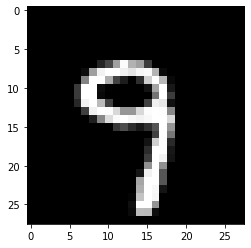

In [4]:
data_dir = 'dataset'
train_dataset = torchvision.datasets.MNIST(data_dir, train=True, download=True)
test_dataset  = torchvision.datasets.MNIST(data_dir, train=False, download=True)

train_transform = transforms.Compose([transforms.ToTensor(),])
test_transform = transforms.Compose([transforms.ToTensor(),])
train_dataset.transform = train_transform
test_dataset.transform = test_transform

m = len(train_dataset)
batch_size = 256

train_data, val_data = random_split(train_dataset, [int(0.8 * m), int(0.2 * m)])
train_loader = DataLoader(train_data, batch_size=batch_size)
val_loader = DataLoader(val_data, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size,shuffle=False) # dangit

for data in train_loader:
    print(data[0].shape)
    break

plt.imshow(data[0][0].squeeze(), cmap='gray')

print('Number of training samples:', len(train_dataset))
print('Number of test samples:', len(test_dataset))

### keeping track of model weights
- 05232023a: epochs=50, lr=1e-3, d=4, inplace=T, ReLU
- 05302023a: epochs=50, lr=1e-3, d=4, inplace=F, ReLU 
- 05302023b: epochs=50, lr=1e-3, d=4, inplace=F, ELU 
- 06072023a: epochs=50, lr=1e-3, d=4, inplace=F, ELU; used deterministic things from PyTorch
    - epoch 50: train loss: 0.02580, val loss: 0.02636
- 06072023b: epochs=50, lr=1e-3, d=4, inplace=F, ELU; additionally used `torch.backends.cudnn.benchmark = False`
    - epoch 50: train loss: 0.02580, val loss: 0.02636
- 06072023c: same settings as 06072023b except d=6
    - epoch 50: train loss: 0.01868, val loss: 0.01931


In [5]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(f'Selected device: {device}')  

loss_fn = torch.nn.MSELoss()
lr = 0.001
num_epochs = 50
d = 6

Selected device: cpu


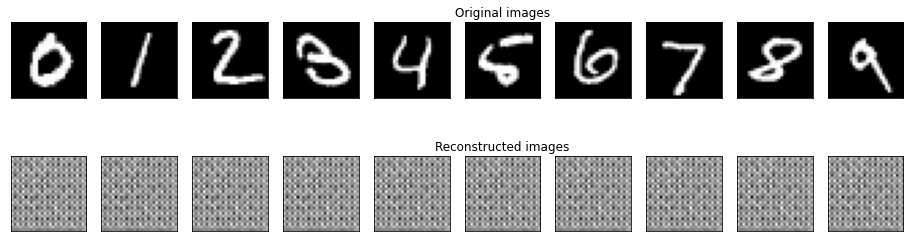

EPOCH 1/50: train loss: 0.08089, val loss: 0.06644
EPOCH 2/50: train loss: 0.05831, val loss: 0.04776
EPOCH 3/50: train loss: 0.03803, val loss: 0.03277
EPOCH 4/50: train loss: 0.03077, val loss: 0.02904
EPOCH 5/50: train loss: 0.02814, val loss: 0.02715
EPOCH 6/50: train loss: 0.02663, val loss: 0.02595
EPOCH 7/50: train loss: 0.02559, val loss: 0.02512
EPOCH 8/50: train loss: 0.02482, val loss: 0.02451
EPOCH 9/50: train loss: 0.02423, val loss: 0.02402
EPOCH 10/50: train loss: 0.02374, val loss: 0.02363


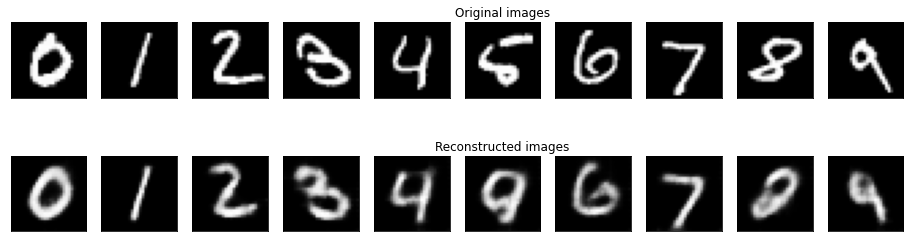

EPOCH 11/50: train loss: 0.02332, val loss: 0.02327
EPOCH 12/50: train loss: 0.02295, val loss: 0.02293
EPOCH 13/50: train loss: 0.02261, val loss: 0.02261
EPOCH 14/50: train loss: 0.02231, val loss: 0.02233
EPOCH 15/50: train loss: 0.02203, val loss: 0.02208
EPOCH 16/50: train loss: 0.02179, val loss: 0.02186
EPOCH 17/50: train loss: 0.02156, val loss: 0.02166
EPOCH 18/50: train loss: 0.02135, val loss: 0.02149
EPOCH 19/50: train loss: 0.02117, val loss: 0.02132
EPOCH 20/50: train loss: 0.02099, val loss: 0.02117


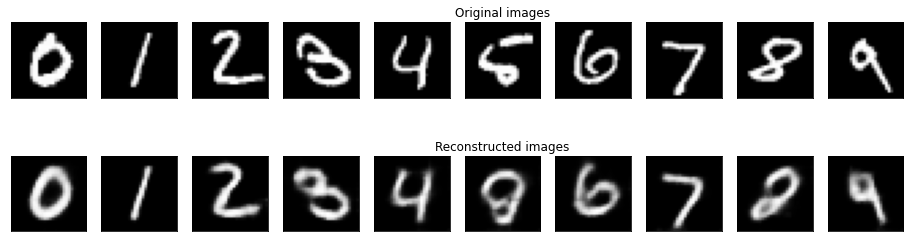

EPOCH 21/50: train loss: 0.02084, val loss: 0.02103
EPOCH 22/50: train loss: 0.02069, val loss: 0.02090
EPOCH 23/50: train loss: 0.02055, val loss: 0.02078
EPOCH 24/50: train loss: 0.02043, val loss: 0.02067
EPOCH 25/50: train loss: 0.02031, val loss: 0.02057
EPOCH 26/50: train loss: 0.02020, val loss: 0.02048
EPOCH 27/50: train loss: 0.02009, val loss: 0.02040
EPOCH 28/50: train loss: 0.02000, val loss: 0.02032
EPOCH 29/50: train loss: 0.01990, val loss: 0.02024
EPOCH 30/50: train loss: 0.01981, val loss: 0.02017


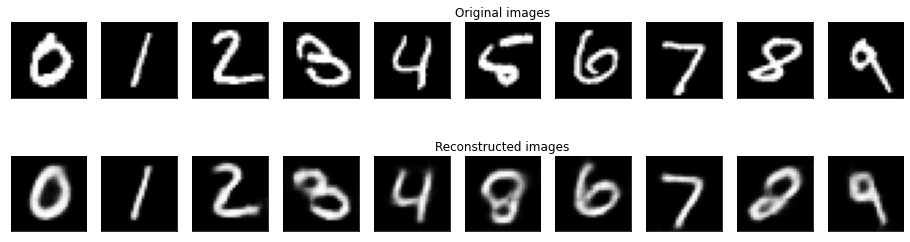

EPOCH 31/50: train loss: 0.01973, val loss: 0.02010
EPOCH 32/50: train loss: 0.01965, val loss: 0.02004
EPOCH 33/50: train loss: 0.01957, val loss: 0.01997
EPOCH 34/50: train loss: 0.01950, val loss: 0.01992
EPOCH 35/50: train loss: 0.01943, val loss: 0.01986
EPOCH 36/50: train loss: 0.01937, val loss: 0.01981
EPOCH 37/50: train loss: 0.01930, val loss: 0.01976
EPOCH 38/50: train loss: 0.01924, val loss: 0.01971
EPOCH 39/50: train loss: 0.01919, val loss: 0.01967
EPOCH 40/50: train loss: 0.01913, val loss: 0.01963


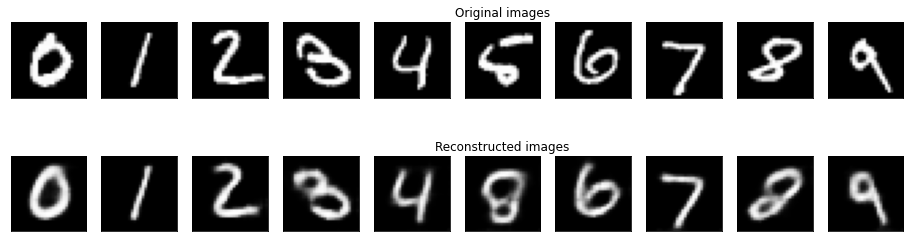

EPOCH 41/50: train loss: 0.01908, val loss: 0.01959
EPOCH 42/50: train loss: 0.01903, val loss: 0.01956
EPOCH 43/50: train loss: 0.01898, val loss: 0.01952
EPOCH 44/50: train loss: 0.01893, val loss: 0.01949
EPOCH 45/50: train loss: 0.01889, val loss: 0.01946
EPOCH 46/50: train loss: 0.01884, val loss: 0.01943
EPOCH 47/50: train loss: 0.01880, val loss: 0.01940
EPOCH 48/50: train loss: 0.01876, val loss: 0.01937
EPOCH 49/50: train loss: 0.01872, val loss: 0.01934
EPOCH 50/50: train loss: 0.01868, val loss: 0.01931


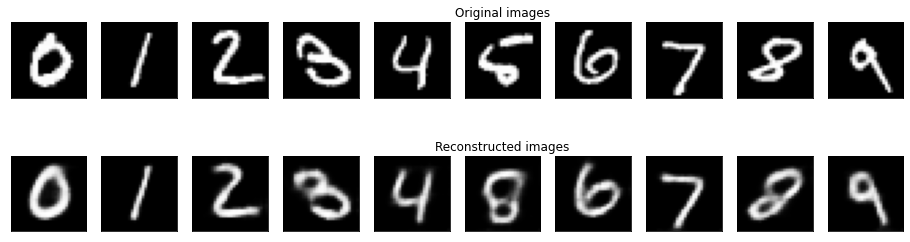

CPU times: user 23min 57s, sys: 44min 22s, total: 1h 8min 20s
Wall time: 9min 59s


(Encoder(
   (encoder_cnn): Sequential(
     (0): Conv2d(1, 8, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
     (1): ELU(alpha=1.0)
     (2): Conv2d(8, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
     (3): ELU(alpha=1.0)
     (4): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2))
     (5): ELU(alpha=1.0)
   )
   (flatten): Flatten(start_dim=1, end_dim=-1)
   (encoder_lin): Sequential(
     (0): Linear(in_features=288, out_features=128, bias=True)
     (1): ELU(alpha=1.0)
     (2): Linear(in_features=128, out_features=6, bias=True)
   )
 ),
 Decoder(
   (decoder_lin): Sequential(
     (0): Linear(in_features=6, out_features=128, bias=True)
     (1): ELU(alpha=1.0)
     (2): Linear(in_features=128, out_features=288, bias=True)
     (3): ELU(alpha=1.0)
   )
   (unflatten): Unflatten(dim=1, unflattened_size=(32, 3, 3))
   (decoder_conv): Sequential(
     (0): ConvTranspose2d(32, 16, kernel_size=(3, 3), stride=(2, 2))
     (1): ELU(alpha=1.0)
     (2): ConvTranspose2d(16, 

In [6]:
%%time

train = True
version = '06072023c' # NOTE: MAKE SURE TO UPDATE THIS EVERY TIME

encoder = Encoder(encoded_space_dim=d,fc2_input_dim=128)
decoder = Decoder(encoded_space_dim=d,fc2_input_dim=128)

if train: 
    params_to_optimize = [
        {'params': encoder.parameters()},
        {'params': decoder.parameters()}
    ]

    optimizer = optim.Adam(params_to_optimize, lr=lr)
    print_every = 10

    encoder.to(device)
    decoder.to(device)
    plot_ae_outputs(encoder, decoder, test_dataset, device, n=10)
    losses = {'train_loss': [], 'val_loss': []}
    for epoch in range(num_epochs):
        train_loss = train_epoch(encoder,decoder,device, train_loader,loss_fn, optimizer)
        val_loss = test_epoch(encoder, decoder, device, val_loader, loss_fn) # better for this to be val_loader?
        print('EPOCH {}/{}: train loss: {:.5f}, val loss: {:.5f}'.format(epoch + 1, num_epochs, train_loss, val_loss))
        losses['train_loss'].append(train_loss)
        losses['val_loss'].append(val_loss)
        if (epoch + 1) % print_every == 0:
            plot_ae_outputs(encoder, decoder, test_dataset, device, n=10)
    # save the model
    torch.save(encoder.state_dict(), 'weights/encoder_weights_' + version + '.pth')
    torch.save(decoder.state_dict(), 'weights/decoder_weights_' + version + '.pth')
else:
    encoder.load_state_dict(torch.load('weights/encoder_weights_' + version + '.pth'))
    decoder.load_state_dict(torch.load('weights/decoder_weights_' + version + '.pth'))

encoder.eval(), decoder.eval()

In [39]:
test_error_on_classes = True
losses = {key.item(): value.item() for key, value in zip(data[1].unique(), torch.zeros(10))}
if test_error_on_classes:
    for label in data[1].unique():
        num_digits = 0
        for ind, data in enumerate(test_loader):
            idx = data[1] == label.item()
            num_digits += idx.sum().item()
            original_images = data[0][idx]
            recon_images = decoder(encoder(original_images))
            losses[label.item()] += loss_fn(original_images, recon_images).item()
        losses[label.item()] /= num_digits
        losses[label.item()] = np.round(losses[label.item()], 7)
pd.Series(losses).sort_values()

1    0.000144
7    0.000541
9    0.000646
4    0.000728
0    0.000733
6    0.000748
3    0.000971
2    0.001020
5    0.001158
8    0.001194
dtype: float64

## Convenience Functions

In [8]:
def p_val(simulated_stats, observed_stat):
    return (np.array([stat.item() for stat in simulated_stats]) > observed_stat.item()).mean()#i

In [10]:
def plot_permutation(
        simulated_stats, 
        observed_stat, 
        bins=50, 
        filepath='', 
        hist_color='tab:blue', 
        line_color='tab.red'
    ):
    print('p_value:', p_val(simulated_stats, observed_stat))
    sns.displot([mmd.item() for mmd in simulated_stats], bins=bins, color=hist_color)
    plt.axvline(observed_stat.item(), color=line_color)
    if filepath != '':
        print('Image saved to ' + str(filepath))
        plt.savefig(filepath + '.jpg', bbox_inches='tight')
    else:
        print('No image saved.')
    return

## Creating X and Y samples

### $X$ = {images of 5's}, $Y$ = {images of 8's}

In [31]:
x_batch = []
y_batch = []
for ind, data in enumerate(test_loader): # filter batches based on digit
    if ind == 3: 
        r_batch = data[0][(data[1] == 5) | (data[1] == 8)]
    elif 3 < ind and ind < 15:
        x_batch.append(data[0][data[1] == 5])
        y_batch.append(data[0][data[1] == 8])
    elif ind == 15: 
        break
x_batch = torch.cat(x_batch, dim=0)
y_batch = torch.cat(y_batch, dim=0)
print('x_batch shape:', x_batch.shape)
print('y_batch shape:', y_batch.shape)
print('r_batch shape:', r_batch.shape)

n_perms = 250

x_batch shape: torch.Size([264, 1, 28, 28])
y_batch shape: torch.Size([277, 1, 28, 28])
r_batch shape: torch.Size([43, 1, 28, 28])


In [14]:
# why not to use torch.Tensor.var()
# ((x_batch.flatten() - x_batch.mean()) ** 2).sum() / (264 * 784) == x_batch.squeeze().flatten(start_dim=1).var()

xy_batch = torch.cat([x_batch, y_batch], dim=0)
xy_batch_sample_mean = xy_batch.squeeze().flatten(start_dim=1).mean(dim=0)
xy_batch_sample_var = ((xy_batch.squeeze().flatten(start_dim=1) - xy_batch_sample_mean) ** 2).sum() 
xy_batch_sample_var /= (len(xy_batch ) - 1)
xy_batch_sample_var = xy_batch_sample_var.item()
print('xy_batch sample variance:', xy_batch_sample_var)

num_features = 28 * 28
print('number of features:', num_features)

scale_sigma_squared = 1 / (xy_batch_sample_var * num_features)
auto_sigma_squared = 1 / num_features
print('bandwidth selected by sklearn\'s scale method:', scale_sigma_squared)
print('bandwidth selected by sklearn\'s auto method:', auto_sigma_squared)

xy_batch sample variance: 51.054012298583984
number of features: 784
bandwidth selected by sklearn's scale method: 2.498354481175635e-05
bandwidth selected by sklearn's auto method: 0.0012755102040816326


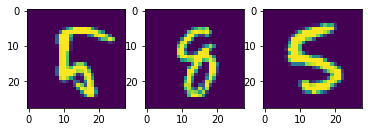

In [25]:
plt.subplot(1,3,1)
plt.imshow(x_batch[0].squeeze())
plt.subplot(1,3,2)
plt.imshow(y_batch[0].squeeze())
plt.subplot(1,3,3)
plt.imshow(r_batch[0].squeeze())

### Statistics for Anisotropic Kernel
- 5's vs. 8's (d=6) (exponential scaling):
    - $\sigma^2 = 2^{9}$: p = 0.0; time = 18s
    - $\sigma^2 = 2^{8}$: p = 0.0; time = 17s
    - $\sigma^2 = 2^{7}$: p = 0.0; time = 18s
    - $\sigma^2 = 2^{6}$: p = 0.0; time = 17s
    - $\sigma^2 = 2^{5}$: p = 0.0; time = 17s
    - $\sigma^2 = 2^{4}$: p = 0.0; time = 17s
    - $\sigma^2 = 2^{3}$: p = 0.0; time = 16s
    - $\sigma^2 = 2^{2}$: p = 0.0; time = 15s
    - $\sigma^2 = 2^{1}$: p = 0.0; time = 15s
    - $\sigma^2 = 2^{0}$: p = 0.0; time = 15s
    - $\sigma^2 = 2^{-1}$: p = 0.0; time = 17s
    - $\sigma^2 = 2^{-2}$: p = 0.0; time = 18s
    - $\sigma^2 = 2^{-3}$: p = 0.0; time = 17s

100%|██████████| 250/250 [00:17<00:00, 14.44it/s]


bandwidth: 16
p_value: 0.0
Image saved to images_latentdim6/diff_anisotropic_s4_5v8


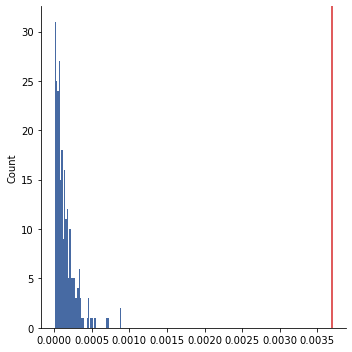

100%|██████████| 250/250 [00:17<00:00, 13.99it/s]


bandwidth: 32
p_value: 0.0
Image saved to images_latentdim6/diff_anisotropic_s5_5v8


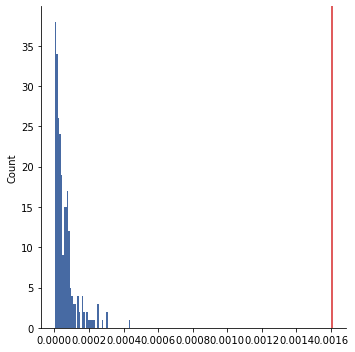

100%|██████████| 250/250 [00:17<00:00, 14.13it/s]


bandwidth: 64
p_value: 0.0
Image saved to images_latentdim6/diff_anisotropic_s6_5v8


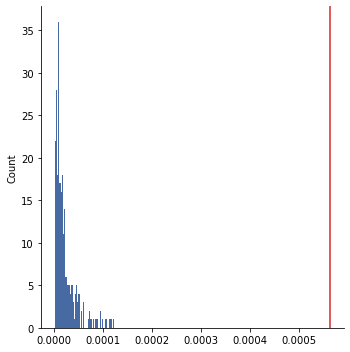

100%|██████████| 250/250 [00:18<00:00, 13.84it/s]


bandwidth: 128
p_value: 0.0
Image saved to images_latentdim6/diff_anisotropic_s7_5v8


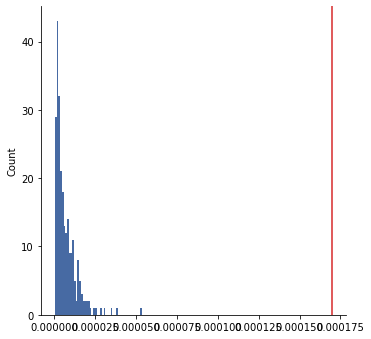

100%|██████████| 250/250 [00:17<00:00, 14.09it/s]


bandwidth: 256
p_value: 0.0
Image saved to images_latentdim6/diff_anisotropic_s8_5v8


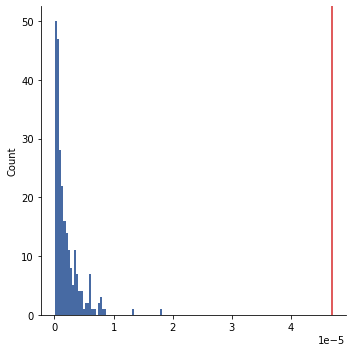

100%|██████████| 250/250 [00:18<00:00, 13.43it/s]


bandwidth: 512
p_value: 0.0
Image saved to images_latentdim6/diff_anisotropic_s9_5v8


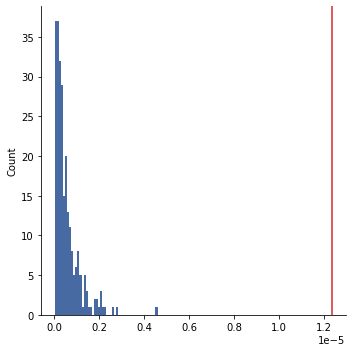

CPU times: user 3min 16s, sys: 6min 37s, total: 9min 53s
Wall time: 2min 2s


In [57]:
%%time

# anisotropic mmd

encoder.eval()
for val in [4, 5, 6, 7, 8, 9]:
    observed_mmd_anisotropic5v8, simulated_mmds_anisotropic5v8 = permutation_test_anisotropic_mmd(
        x_batch, y_batch, r_batch, encoder, n_perms=n_perms, sigma_squared=(2 ** val)
    )

    hist_color = '#093885'
    line_color = 'tab:red'
    filepath = 'images_latentdim6/diff_anisotropic_s' + str(val) + '_5v8' # kind-trial, kind-kernel, sigma^2, digits-compared

    print('bandwidth:', str(np.round(2 ** val, 3)))
    plot_permutation(
        simulated_mmds_anisotropic5v8, 
        observed_mmd_anisotropic5v8, 
        hist_color = hist_color, 
        line_color = line_color,
        filepath = filepath
    )
    plt.show()

### Statistics for Encoder Kernel
- 5's vs. 8's (d=6) (exponential scaling):
    - $\sigma^2 = 2^{9}$: p = 0.0; time = 31s
    - $\sigma^2 = 2^{8}$: p = 0.0; time = 31s 
    - $\sigma^2 = 2^{7}$: p = 0.0; time = 31s
    - $\sigma^2 = 2^{6}$: p = 0.0; time = 31s
    - $\sigma^2 = 2^{5}$: p = 0.0; time = 31s
    - $\sigma^2 = 2^{4}$: p = 0.0; time = 32s
    - $\sigma^2 = 2^{3}$: p = 0.0; time = 32s
    - $\sigma^2 = 2^{2}$: p = 0.0; time = 32s
    - $\sigma^2 = 2^{1}$: p = 0.0; time = 30s
    - $\sigma^2 = 2^{0}$: p = 0.0; time = 32s
    - $\sigma^2 = 2^{-1}$: p = 0.0; time = 30s
    - $\sigma^2 = 2^{-2}$: p = 0.0; time = 32s
    - $\sigma^2 = 2^{-3}$: p = 0.0; time = 34s

100%|██████████| 250/250 [00:31<00:00,  7.96it/s]


bandwidth: 128
p_value: 0.0
Image saved to images_latentdim6/diff_encoder_s7_5v8


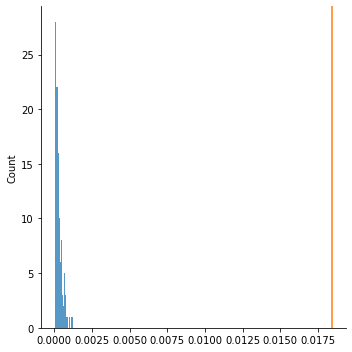

100%|██████████| 250/250 [00:31<00:00,  7.89it/s]


bandwidth: 256
p_value: 0.0
Image saved to images_latentdim6/diff_encoder_s8_5v8


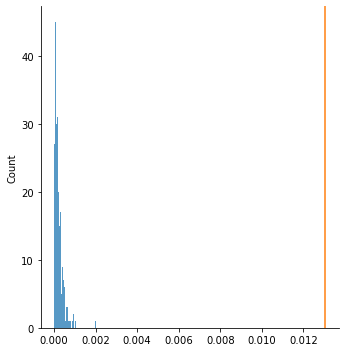

100%|██████████| 250/250 [00:31<00:00,  7.95it/s]


bandwidth: 512
p_value: 0.0
Image saved to images_latentdim6/diff_encoder_s9_5v8


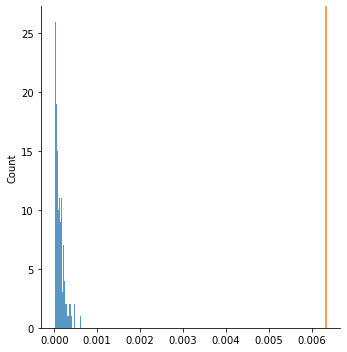

CPU times: user 2min 6s, sys: 5min 53s, total: 7min 59s
Wall time: 1min 59s


In [56]:
%%time

# encoder mmd
for val in [7, 8, 9]:
    observed_mmd_encoder5v8, simulated_mmds_encoder5v8 = permutation_test_encoder_mmd(
        x_batch, y_batch, r_batch, encoder, n_perms=n_perms, sigma_squared=(2 ** val)
    )

    hist_color = 'tab:blue'
    line_color = 'tab:orange'
    filepath = 'images_latentdim6/diff_encoder_s' + str(val) + '_5v8'

    print('bandwidth:', str(np.round(2 ** val, 3)))
    plot_permutation(
        simulated_mmds_encoder5v8,
        observed_mmd_encoder5v8,
        hist_color = hist_color,
        line_color = line_color,
        filepath = filepath
    )
    plt.show()

### Statistics for Isotropic Kernel
- 5's vs. 8's (d=6):
    - $\sigma^2 = 2^{9}$: p = 0.0; time = 17s
    - $\sigma^2 = 2^{8}$: p = 0.0; time = 17s
    - $\sigma^2 = 2^{7}$: p = 0.0; time = 18s
    - $\sigma^2 = 2^{6}$: p = 0.0; time = 18s
    - $\sigma^2 = 2^{5}$: p = 0.0; time = 19s
    - $\sigma^2 = 2^{4}$: p = 0.0; time = 18s
    - $\sigma^2 = 2^{3}$: p = 0.0; time = 16s
    - $\sigma^2 = 2^{2}$: p = 0.0; time = 16s
    - $\sigma^2 = 2^{1}$: p = 0.0; time = 16s
    - $\sigma^2 = 2^{0}$: p = 0.0; time = 17s
    - $\sigma^2 = 2^{-1}$: p = 0.0; time = 18s
    - $\sigma^2 = 2^{-2}$: p = 0.0; time = 17s
    - $\sigma^2 = 2^{-3}$: p = 0.0; time = 17s

100%|██████████| 250/250 [00:18<00:00, 13.32it/s]


bandwidth: 16
p_value: 0.0
Image saved to images_latentdim6/diff_isotropic_s4_5v8


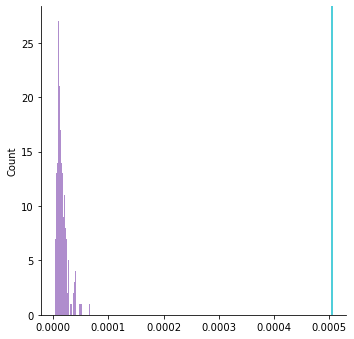

100%|██████████| 250/250 [00:19<00:00, 12.97it/s]


bandwidth: 32
p_value: 0.0
Image saved to images_latentdim6/diff_isotropic_s5_5v8


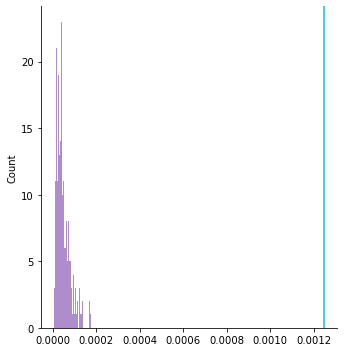

100%|██████████| 250/250 [00:18<00:00, 13.28it/s]


bandwidth: 64
p_value: 0.0
Image saved to images_latentdim6/diff_isotropic_s6_5v8


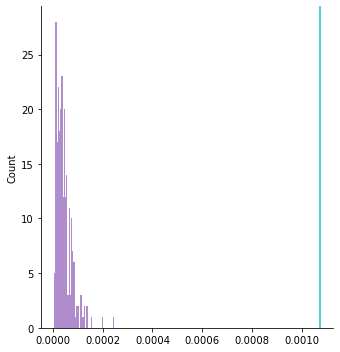

100%|██████████| 250/250 [00:18<00:00, 13.59it/s]


bandwidth: 128
p_value: 0.0
Image saved to images_latentdim6/diff_isotropic_s7_5v8


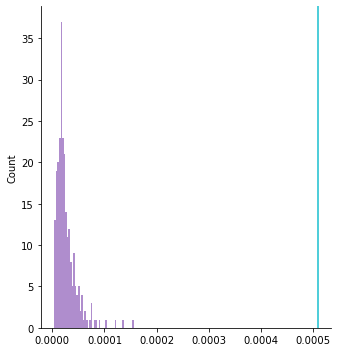

100%|██████████| 250/250 [00:17<00:00, 13.97it/s]

bandwidth: 256
p_value: 0.0
Image saved to images_latentdim6/diff_isotropic_s8_5v8


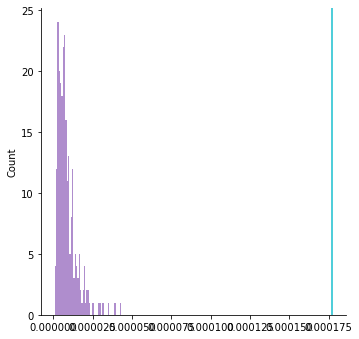

100%|██████████| 250/250 [00:17<00:00, 13.94it/s]

bandwidth: 512
p_value: 0.0
Image saved to images_latentdim6/diff_isotropic_s9_5v8


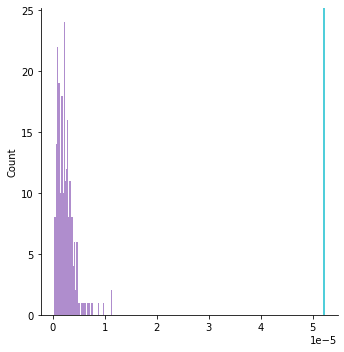

CPU times: user 2min 15s, sys: 6min 23s, total: 8min 39s
Wall time: 1min 52s


In [55]:
%%time

# isotropic mmd
for val in [4, 5, 6, 7, 8, 9]:
    observed_mmd_isotropic5v8, simulated_mmds_isotropic5v8 = permutation_test_isotropic_mmd(
        x_batch, y_batch, r_batch, n_perms=n_perms, sigma_squared = (2 ** val)
    )

    hist_color = 'tab:purple'
    line_color = 'tab:cyan'
    filepath = 'images_latentdim6/diff_isotropic_s' + str(val) + '_5v8'

    print('bandwidth:', str(np.round(2 ** val, 3)))
    plot_permutation(
        simulated_mmds_isotropic5v8,
        observed_mmd_isotropic5v8,
        hist_color = hist_color,
        line_color = line_color,
        filepath = filepath
    )
    plt.show()

### playing with normal Gaussian MMD (which fails, albeit without bandwidth tuning)

In [74]:
def gaussian_kernel(x, y, sigma_squared=1):
    return torch.exp(-((x-y) ** 2).sum() / sigma_squared ) # oops there's supposed to be a 2

def gaussian_inner_prod(X, Y, sigma_squared=1):
    out = 0
    for ind_x in range(len(X)):
        for ind_y in range(len(Y)):
            out += gaussian_kernel(X[ind_x], Y[ind_y], sigma_squared=sigma_squared)
    return out / (len(X) * len(Y))

def gaussian_mmd(X, Y, sigma_squared=1):
    kxx, kxy, kyy = 0, 0, 0
    kxx = gaussian_inner_prod(X, X, sigma_squared=sigma_squared)
    kxy = gaussian_inner_prod(X, Y, sigma_squared=sigma_squared)
    kyy = gaussian_inner_prod(Y, Y, sigma_squared=sigma_squared)
    return kxx - (2 * kxy) + kyy 

def permutation_test_gaussian_mmd(X, Y, n_perms=100, sigma_squared=1):
    obs_mmd = gaussian_mmd(X, Y, sigma_squared=sigma_squared)
    XY_batch = torch.cat([X, Y], dim=0)
    sim_mmds = []
    for _ in tqdm.trange(n_perms):
        shuffled_idx = torch.randperm(len(X) + len(Y))
        shuffled_XY_batch = XY_batch[shuffled_idx]
        shuffled_X, shuffled_Y = shuffled_XY_batch[:len(X)], shuffled_XY_batch[len(X):]
        sim_mmds.append(gaussian_mmd(shuffled_X, shuffled_Y, sigma_squared=sigma_squared))
    return obs_mmd, sim_mmds

100%|██████████| 250/250 [07:38<00:00,  1.83s/it]

p_value: 0.0
CPU times: user 8min 5s, sys: 2min 58s, total: 11min 3s
Wall time: 7min 40s


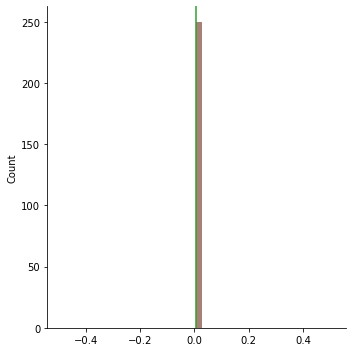

In [99]:
%%time

# 5's vs. 8's
# sigma^2 = 1^2: p = 0.0; time = 7m35s; dirac
# sigma^2 = 2^2: p = 0.0; time = 
# sigma^2 = 3^2: p = 0.0; time = 
# sigma^2 = 4^2: p = 0.0; time =

# sigma^2 = scale; p = 0.0; time = 7m39s; dirac
# sigma^2 = auto; p = 0.0; time = 7m40s; dirac

# gaussian mmd
observed_mmds_gaussian5v8, simulated_mmds_gaussian5v8 = permutation_test_gaussian_mmd(
    x_batch, y_batch, n_perms=n_perms, sigma_squared=(auto_sigma_squared)
)

hist_color = 'tab:brown'
line_color = 'tab:green'
filepath = 'diff_gaussian_sauto_5v8'

plot_permutation(
    simulated_mmds_gaussian5v8,
    observed_mmds_gaussian5v8,
    hist_color = hist_color,
    line_color = line_color,
    filepath = filepath
)

### $X_1$ = {images of 5's}, $X_2$ = {images of 5's}

In [40]:
# testing when x_batch and y_batch are from the same distribution
x1_batch = []
x2_batch = []
r_batch = []
for ind, data in enumerate(test_loader): # filter batches based on digit
    if ind < 3:
        r_batch.append(data[0][data[1] == 5])
    elif 3 <= ind and ind % 2 == 0:
        x1_batch.append(data[0][data[1] == 5])
    elif 3 <= ind and ind % 2 == 1:
        x2_batch.append(data[0][data[1] == 5])
    if ind == 25: break
x1_batch = torch.cat(x1_batch, dim=0)
x2_batch = torch.cat(x2_batch, dim=0)
r_batch = torch.cat(r_batch, dim=0)
print('x1_batch shape:', x1_batch.shape)
print('x2_batch shape:', x2_batch.shape)
print('r_batch shape:', r_batch.shape)

x1_batch shape: torch.Size([263, 1, 28, 28])
x2_batch shape: torch.Size([273, 1, 28, 28])
r_batch shape: torch.Size([70, 1, 28, 28])


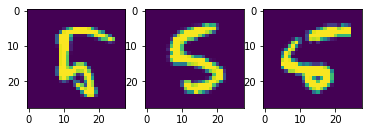

In [35]:
plt.subplot(1,3,1)
plt.imshow(x1_batch[0].squeeze())
plt.subplot(1,3,2)
plt.imshow(x2_batch[0].squeeze())
plt.subplot(1,3,3)
plt.imshow(r_batch[0].squeeze())

### Statistics for Anisotropic Kernel
- 5's vs. 5's (d=6) (exponential scaling):
    - $\sigma^2 = 2^{9}$: p = 0.836; time = 16s
    - $\sigma^2 = 2^{8}$: p = 0.848; time = 16s
    - $\sigma^2 = 2^{7}$: p = 0.828; time = 16s
    - $\sigma^2 = 2^{6}$: p = 0.800; time = 16s
    - $\sigma^2 = 2^{5}$: p = 0.860; time = 17s
    - $\sigma^2 = 2^{4}$: p = 0.832; time = 16s
    - $\sigma^2 = 2^{3}$: p = 0.856; time = 17s
    - $\sigma^2 = 2^{2}$: p = 0.824; time = 16s
    - $\sigma^2 = 2^{1}$: p = 0.784; time = 19s
    - $\sigma^2 = 2^{0}$: p = 0.692; time = 17s
    - $\sigma^2 = 2^{-1}$: p = 0.532; time = 16s
    - $\sigma^2 = 2^{-2}$: p = 0.476; time = 17s
    - $\sigma^2 = 2^{-3}$: p = 0.320; time = 17s

100%|██████████| 250/250 [00:16<00:00, 15.39it/s]


bandwidth: 128
p_value: 0.828
Image saved to images_latentdim6/same_anisotropic_s7_5v5


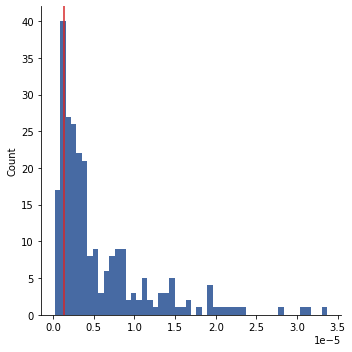

100%|██████████| 250/250 [00:16<00:00, 15.10it/s]


bandwidth: 256
p_value: 0.848
Image saved to images_latentdim6/same_anisotropic_s8_5v5


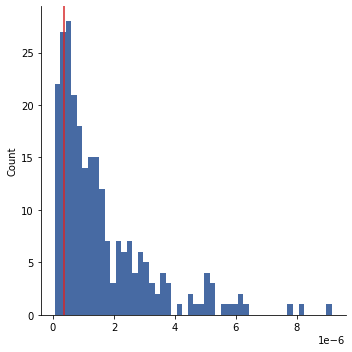

100%|██████████| 250/250 [00:16<00:00, 15.13it/s]


bandwidth: 512
p_value: 0.836
Image saved to images_latentdim6/same_anisotropic_s9_5v5


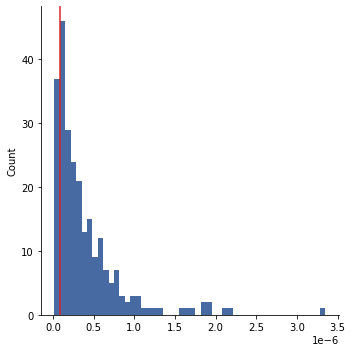

CPU times: user 1min 33s, sys: 3min 11s, total: 4min 44s
Wall time: 56.3 s


In [53]:
%%time

# anisotropic mmd
for val in [7, 8, 9]:
    observed_mmd_anisotropic_same, simulated_mmds_anisotropic_same = permutation_test_anisotropic_mmd(
        x1_batch, x2_batch, r_batch, encoder, n_perms=n_perms, sigma_squared = (2 ** val)
    )

    hist_color = '#093885'
    line_color = 'tab:red'
    filepath = 'images_latentdim6/same_anisotropic_s' + str(val) + '_5v5'

    print('bandwidth:', str(np.round(2 ** val, 3)))
    plot_permutation(
        simulated_mmds_anisotropic_same, 
        observed_mmd_anisotropic_same, 
        hist_color = hist_color, 
        line_color = line_color,
        filepath = filepath
    )
    plt.show()

### Statistics for Encoder Kernel
- $\sigma^2 = 2^{}$: p = ; time = 
- 5's vs. 5's (d=6) (exponential scaling):
    - $\sigma^2 = 2^{9}$: p = 0.092; time = 30s
    - $\sigma^2 = 2^{8}$: p = 0.128; time = 32s
    - $\sigma^2 = 2^{7}$: p = 0.112; time = 33s
    - $\sigma^2 = 2^{6}$: p = 0.112; time = 31s
    - $\sigma^2 = 2^{5}$: p = 0.064; time = 33s
    - $\sigma^2 = 2^{4}$: p = 0.036; time = 32s
    - $\sigma^2 = 2^{3}$: p = 0.052; time = 33s
    - $\sigma^2 = 2^{2}$: p = 0.068; time = 35s
    - $\sigma^2 = 2^{1}$: p = 0.036; time = 31s
    - $\sigma^2 = 2^{0}$: p = 0.020; time = 33s
    - $\sigma^2 = 2^{-1}$: p = 0.196; time = 32s
    - $\sigma^2 = 2^{-2}$: p = 0.516; time = 31s
    - $\sigma^2 = 2^{-3}$: p = 0.492; time = 36s

100%|██████████| 250/250 [00:33<00:00,  7.53it/s]


bandwidth: 128
p_value: 0.112
Image saved to images_latentdim6/same_encoder_s7_5v5


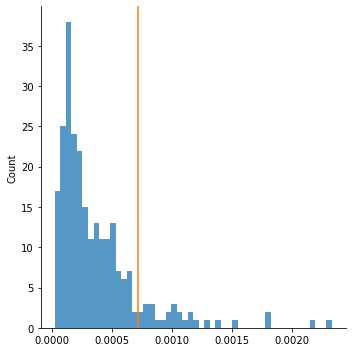

100%|██████████| 250/250 [00:32<00:00,  7.73it/s]


bandwidth: 256
p_value: 0.128
Image saved to images_latentdim6/same_encoder_s8_5v5


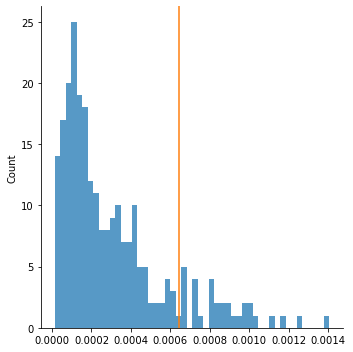

100%|██████████| 250/250 [00:30<00:00,  8.25it/s]


bandwidth: 512
p_value: 0.092
Image saved to images_latentdim6/same_encoder_s9_5v5


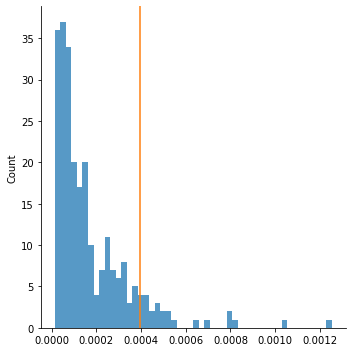

CPU times: user 2min 7s, sys: 5min 43s, total: 7min 51s
Wall time: 1min 58s


In [52]:
%%time

# encoder mmd
for val in [7, 8, 9]:
    observed_mmd_encoder_same, simulated_mmds_encoder_same = permutation_test_encoder_mmd(
        x1_batch, x2_batch, r_batch, encoder, n_perms=n_perms, sigma_squared=(2 ** val)
    )

    hist_color = 'tab:blue'
    line_color = 'tab:orange'
    filepath = 'images_latentdim6/same_encoder_s' + str(val) + '_5v5'

    print('bandwidth:', str(np.round(2 ** val, 3)))
    plot_permutation(
        simulated_mmds_encoder_same, 
        observed_mmd_encoder_same, 
        hist_color = hist_color, 
        line_color = line_color,
        filepath = filepath
    )
    plt.show()

### Statistics for Isotropic Kernel
- 5's vs. 5's (d=6):
    - $\sigma^2 = 2^{9}$: p = 0.144; time = 17s
    - $\sigma^2 = 2^{8}$: p = 0.148; time = 18s
    - $\sigma^2 = 2^{7}$: p = 0.100; time = 18s
    - $\sigma^2 = 2^{6}$: p = 0.132; time = 19s
    - $\sigma^2 = 2^{5}$: p = 0.140; time = 22s
    - $\sigma^2 = 2^{4}$: p = 0.148; time = 18s
    - $\sigma^2 = 2^{3}$: p = 0.120; time = 19s; 
    - $\sigma^2 = 2^{2}$: p = 0.232; time = 18s; 
    - $\sigma^2 = 2^{1}$: p = 0.316; time = 18s; 
    - $\sigma^2 = 2^{0}$: p = 0.192; time = 18s; split into two narrow peaks
    - $\sigma^2 = 2^{-1}$: p = 0.22; time = 18s; dirac
    - $\sigma^2 = 2^{-2}$: p = 0.0; time = 19s; dirac
    - $\sigma^2 = 2^{-3}$: p = 0.0; time = 17s; dirac

100%|██████████| 250/250 [00:17<00:00, 13.99it/s]


bandwidth: 128
p_value: 0.1
Image saved to images_latentdim6/same_isotropic_s7_5v5


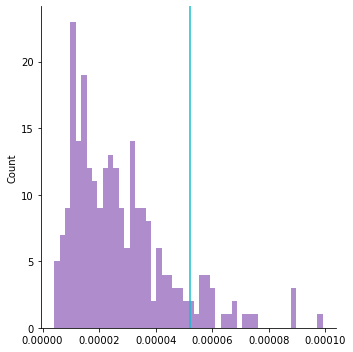

100%|██████████| 250/250 [00:18<00:00, 13.53it/s]


bandwidth: 256
p_value: 0.148
Image saved to images_latentdim6/same_isotropic_s8_5v5


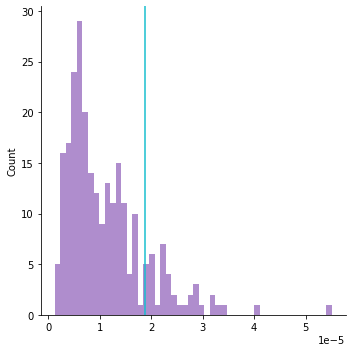

100%|██████████| 250/250 [00:17<00:00, 14.07it/s]


bandwidth: 512
p_value: 0.144
Image saved to images_latentdim6/same_isotropic_s9_5v5


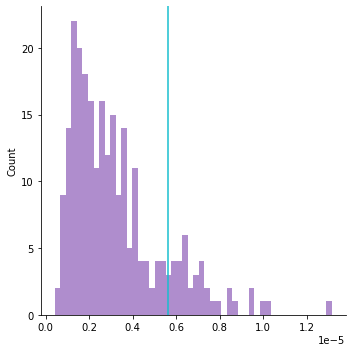

CPU times: user 1min 6s, sys: 3min 10s, total: 4min 17s
Wall time: 54.9 s


In [54]:
%%time
# isotropic mmd
for val in [7, 8, 9]:
    observed_mmd_isotropic_same, simulated_mmds_isotropic_same = permutation_test_isotropic_mmd(
        x1_batch, x2_batch, r_batch, n_perms=n_perms, sigma_squared=(2 ** val)
    )

    hist_color = 'tab:purple'
    line_color = 'tab:cyan'
    filepath = 'images_latentdim6/same_isotropic_s' + str(val) + '_5v5'

    print('bandwidth:', str(np.round(2 ** val, 3)))
    plot_permutation(
        simulated_mmds_isotropic_same, 
        observed_mmd_isotropic_same, 
        hist_color = hist_color, 
        line_color = line_color,
        filepath = filepath
    )
    plt.show()